In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
number_cols = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df[number_cols] = scaler.fit_transform(df[number_cols])
X = df[number_cols].copy()
X.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,-0.142246
1,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,-0.142246
2,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,-0.142246
3,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,-0.142246
4,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,-0.142246


In [6]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [12]:
inertias = []
distortions = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k).fit(X)

    d = cdist(X, model.cluster_centers_, metric="euclidean")
    nearest = np.min(d, axis=1)
    squared_dist = np.mean(nearest**2)

    distortions.append(squared_dist)
    inertias.append(model.inertia_)

    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]

    

1 : 8.0
2 : 6.155809711786294
3 : 5.096471021193003
4 : 4.576796832709323
5 : 4.128188480277495
6 : 3.8286380174632373
7 : 3.6451060750882402
8 : 3.448120327662531
9 : 3.292988141791173


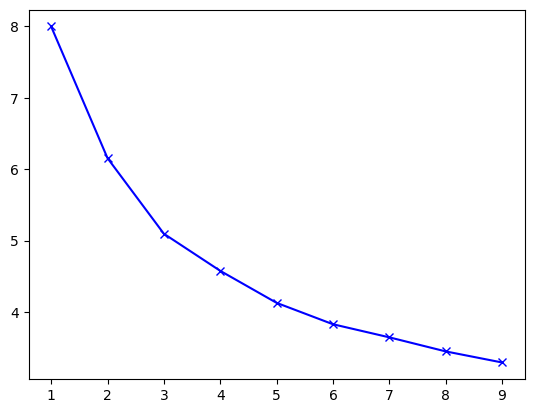

In [13]:
for k, val in mapping1.items():
    print(f"{k} : {val}")
plt.plot(K, distortions, 'bx-')
plt.show()

1 : 22583.99999999999
2 : 17377.850816372717
3 : 14387.337692827841
4 : 12920.29745873842
5 : 11653.876079823365
6 : 10808.245123298722
7 : 10290.134449974106
8 : 9734.043684991328
9 : 9296.105524276487


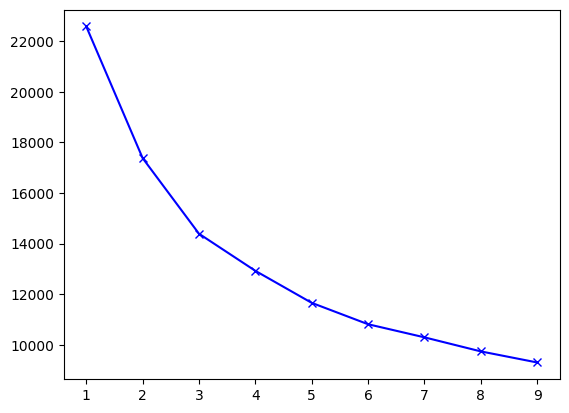

In [14]:
for k, val in mapping2.items():
    print(f"{k} : {val}")
plt.plot(K, inertias, 'bx-')
plt.show()

In [16]:
from kneed import KneeLocator
k1 = KneeLocator(K, inertias, curve='convex', direction="decreasing")


print(k1.knee)

3
